## Experiment 3
#### Program to implement a three-layer neural network using Tensor flow library (only, no keras) to classify MNIST handwritten digits dataset. Demonstrate the implementation of feed-forward and back-propagation approaches.

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.cast(x_train.reshape(-1, 784), dtype=tf.float32)/255.0
x_test = tf.cast(x_test.reshape(-1, 784), dtype=tf.float32)/255.0

y_train = tf.cast(tf.one_hot(y_train, depth=10), dtype=tf.int64)
y_test = tf.cast(tf.one_hot(y_test, depth=10), dtype=tf.int64)

In [54]:
# Define network parameters
learning_rate = 1e-4
num_epochs = 20
batch_size = 32

In [55]:
class NeuralNetwork(tf.Module):
    def __init__(self):
        super().__init__()
        self.n_hidden1 = 96
        self.n_hidden2 = 128
        self.weights = {
            'h1': tf.Variable(tf.random.normal([784, self.n_hidden1])),
            'h2': tf.Variable(tf.random.normal([self.n_hidden1, self.n_hidden2])),
            'out': tf.Variable(tf.random.normal([self.n_hidden2, 10]))
        }
        self.biases = {
            'b1': tf.Variable(tf.zeros([self.n_hidden1])),
            'b2': tf.Variable(tf.zeros([self.n_hidden2])),
            'out': tf.Variable(tf.zeros([10]))
        }

    def __call__(self, x):
        layer1 = tf.nn.sigmoid(tf.matmul(x, self.weights['h1']) + self.biases['b1'])
        layer2 = tf.nn.sigmoid(tf.matmul(layer1, self.weights['h2']) + self.biases['b2'])
        output_layer = tf.add(tf.matmul(layer2, self.weights['out']), self.biases['out'])
        return output_layer

In [ ]:
# Instantiate model
model = NeuralNetwork()

loss_fn = tf.losses.CategoricalCrossentropy(from_logits=True)
optimizer = tf.optimizers.Adam(learning_rate=learning_rate)

lossCurve = []

In [ ]:
for epoch in range(num_epochs):
    avg_loss = 0
    total_batch = int(x_train.shape[0] / batch_size)
    for i in range(total_batch):
        batch_x = x_train[i * batch_size:(i + 1) * batch_size]
        batch_y = y_train[i * batch_size:(i + 1) * batch_size]
        with tf.GradientTape() as tape:
            logits = model(batch_x)
            loss_value = loss_fn(batch_y, logits)
        grads = tape.gradient(loss_value, model.trainable_variables)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))
        avg_loss += loss_value / total_batch
    lossCurve.append(avg_loss)
    print(f"Epoch {epoch + 1}, Loss: {avg_loss:.4f}")

test_logits = model(x_test)
test_accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(test_logits, 1), tf.argmax(y_test, 1)), tf.float32))
print(f"Test Accuracy: {test_accuracy.numpy():.4f}")


Epoch 1, Loss: 0.2361
Epoch 2, Loss: 0.2280
Epoch 3, Loss: 0.2204
Epoch 4, Loss: 0.2133
Epoch 5, Loss: 0.2065
Epoch 6, Loss: 0.2002
Epoch 7, Loss: 0.1942
Epoch 8, Loss: 0.1885
Epoch 9, Loss: 0.1831
Epoch 10, Loss: 0.1780
Epoch 11, Loss: 0.1731
Epoch 12, Loss: 0.1685
Epoch 13, Loss: 0.1640
Epoch 14, Loss: 0.1597
Epoch 15, Loss: 0.1557
Epoch 16, Loss: 0.1517
Epoch 17, Loss: 0.1480
Epoch 18, Loss: 0.1444
Epoch 19, Loss: 0.1409
Epoch 20, Loss: 0.1375
Test Accuracy: 0.9337


In [70]:
import numpy as np

loss = np.array(lossCurve[-20:])
loss

array([0.23613195, 0.22799717, 0.22038858, 0.21325037, 0.2065344 ,
       0.20019758, 0.19420427, 0.18852319, 0.1831292 , 0.17799856,
       0.17311212, 0.16845056, 0.16399814, 0.15973814, 0.1556566 ,
       0.15174061, 0.14797772, 0.14435731, 0.14086981, 0.13750654],
      dtype=float32)

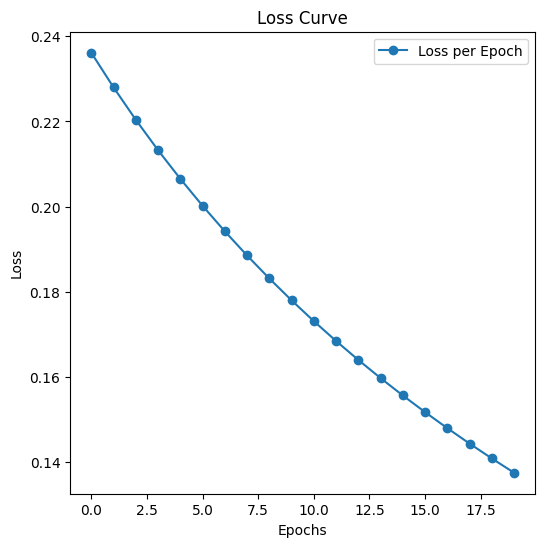

In [91]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.plot(np.arange(20), loss, marker='o', label="Loss per Epoch")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Curve");

## Model Descrption

#### Architecture

The model consists of three fully connected layers:

Input Layer: Accepts a flattened 784-dimensional input vector, which suggests an input size of 28x28 grayscale images.

Hidden Layer 1: Contains 96 neurons with a sigmoid activation function.

Hidden Layer 2: Contains 128 neurons with a sigmoid activation function.

Output Layer: Outputs logits for 10 classes, suitable for classification tasks.

#### Weights and Biases

The model maintains trainable parameters in the form of weights and biases, stored in dictionaries.
Weights are initialized using a normal distribution, while biases are initialized to zeros.

#### Forward Pass

The input passes through two hidden layers, each using the sigmoid activation function.
The output layer computes raw scores (logits) using a linear transformation.

#### Loss Function and Optimizer

The loss function used is Categorical Crossentropy, which is well-suited for multi-class classification.
The optimizer used is Adam with a learning rate of 1e-4 to update weights and biases efficiently.

#### Training Parameters

Number of Epochs: 20

Batch Size: 32

Learning Rate: 1e-4


## Code Description


#### 1. Data Preprocessing
We use the MNIST dataset, which consists of 60,000 training images and 10,000 test images each 28×28 pixels. The images are reshaped into 784-dimensional vectors and normalized for better training. The labels are one-hot encoded as well.

#### 2. Neural Network Architecture
The model is implemented using TensorFlow's tf.Module and consists of:

Input layer: 784 neurons (flattened image input).

Hidden Layer 1: 96 neurons with a sigmoid activation function.

Hidden Layer 2: 128 neurons with a sigmoid activation function.

Output Layer: 10 neurons with logits output.

Weights and biases are initialized using a normal distribution and zero values, respectively.

#### 3. Loss Function and Optimizer
Loss Function: Categorical Crossentropy (from logits) is used to measure classification performance.

Optimizer: Adam optimizer with a learning rate of 1e-4 is used for efficient gradient-based optimization.

#### 4. Training Process
The training loop runs for 20 epochs, processing mini-batches of 32 samples per step.
Each batch is forward-passed through the network, and the loss is computed.
GradientTape is used to compute gradients, and the optimizer updates the model parameters.
The average loss per epoch is recorded and displayed.

#### 5. Model Evaluation
After training, the model is tested on the 10,000 test images.
Predictions are compared to true labels, and the test accuracy is computed.

#### 6. Possible Improvements
Replacing sigmoid activations with ReLU can help prevent vanishing gradient issues.

A deeper architecture may enhance accuracy.